   n_estimators  AdaBoost  Gradient Boosting
0            10  0.907407           0.944444
1            50  0.925926           0.981481
2           100  0.925926           1.000000
3           200  0.925926           1.000000
4           500  0.925926           1.000000
5          1000  0.925926           1.000000


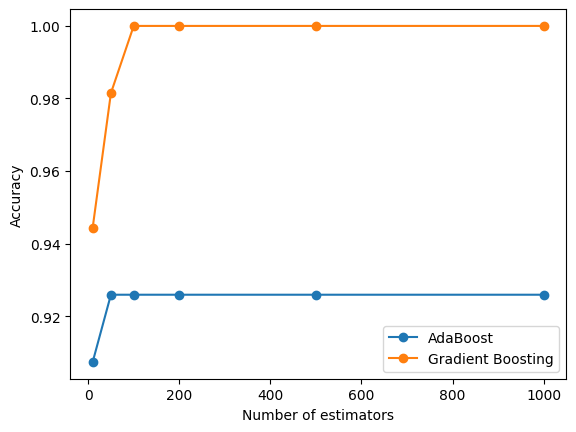

   Train size  Test size  AB correct  AB incorrect  GB correct  GB incorrect
0         104         54          50             4          54             0
   Train size  Test size  AB correct  AB incorrect  GB correct  GB incorrect
0          84         54          47             7          52             2
   Train size  Test size  AB correct  AB incorrect  GB correct  GB incorrect
0          54         54          31            23          47             7


In [17]:
from sklearn.datasets import load_wine
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# загрузка данных
iris = load_wine()
X = iris.data
y = iris.target

# разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# определение количества базовых моделей для алгоритмов AdaBoost и Gradient boosting
n_estimators = [10, 50, 100, 200, 500, 1000]

# список для сохранения точности классификации
accuracy_ada = []
accuracy_gb = []

# обучение алгоритмов и оценка точности классификации для каждого значения n_estimators
for n in n_estimators:
    # AdaBoost
    ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=n, random_state=42)
    ada.fit(X_train, y_train)
    y_pred_ada = ada.predict(X_test)
    accuracy_ada.append(accuracy_score(y_test, y_pred_ada))

    # Gradient boosting
    gb = GradientBoostingClassifier(max_depth=1, n_estimators=n, random_state=42)
    gb.fit(X_train, y_train)
    y_pred_gb = gb.predict(X_test)
    accuracy_gb.append(accuracy_score(y_test, y_pred_gb))

# вывод результатов в таблицу и на график
results = pd.DataFrame({'n_estimators': n_estimators, 'AdaBoost': accuracy_ada, 'Gradient Boosting': accuracy_gb})
print(results)

plt.plot(n_estimators, accuracy_ada, '-o', label='AdaBoost')
plt.plot(n_estimators, accuracy_gb, '-o', label='Gradient Boosting')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# проверка устойчивости алгоритма
n_test = [20, 40, 70]

for n in n_test:
    # удаление n записей из обучающей выборки
    X_train_new = np.delete(X_train, np.arange(n), axis=0)
    y_train_new = np.delete(y_train, np.arange(n), axis=0)

    # обучение алгоритмов на измененных данных
    ada_new = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
    ada_new.fit(X_train_new, y_train_new)
    y_pred_ada_new = ada_new.predict(X_test)

    gb_new = GradientBoostingClassifier(max_depth=1, n_estimators=100, random_state=42)
    gb_new.fit(X_train_new, y_train_new)
    y_pred_gb_new = gb_new.predict(X_test)

    # оценка качества классификации на измененных данных
    accuracy_ada_new = accuracy_score(y_test, y_pred_ada_new)
    accuracy_gb_new = accuracy_score(y_test, y_pred_gb_new)

    # вывод результатов в таблицу
    results_new = pd.DataFrame({'Train size': [X_train_new.shape[0]], 'Test size': [X_test.shape[0]], 
                                'AB correct': [(y_test == y_pred_ada_new).sum()], 
                                'AB incorrect': [(y_test != y_pred_ada_new).sum()],
                                'GB correct': [(y_test == y_pred_gb_new).sum()], 
                                'GB incorrect': [(y_test != y_pred_gb_new).sum()]})
    print(results_new)